In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,movement_level,mean,sub_mean_1,sub_mean_2,sub_mean_3,sub_mean_4,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
quality,1.000000,-0.546169,-0.087735,0.314105,0.117103,-0.202867,-0.332356,-0.542825,0.000000,0.000000,-0.078585,-0.037923,-0.109712,-0.121234,-0.114808,-0.132473,0.044705,-0.155368,-0.142616,0.016378,-0.043886,-0.060255,0.010829,0.004486,0.278340,0.302272,-0.250797
bits,-0.546169,1.000000,0.265597,-0.440523,-0.207900,0.301425,0.476383,0.984354,-0.182503,-0.171839,-0.128677,0.106659,0.534790,0.533225,0.533039,0.552107,0.182950,0.662347,0.666244,0.409231,0.058784,0.097869,0.019102,0.042710,0.165720,0.169413,0.252393
intra_parts,-0.087735,0.265597,1.000000,-0.326240,-0.373677,-0.186377,-0.293409,0.228438,0.341633,0.357337,0.364317,0.061530,0.402977,0.423291,0.420821,0.422763,0.209951,0.531125,0.519474,0.348958,-0.025600,-0.025407,0.042576,0.083751,0.058709,0.065097,0.075806
skip_parts,0.314105,-0.440523,-0.326240,1.000000,-0.171666,-0.237137,-0.402348,-0.400267,0.117658,0.105322,0.053325,-0.056202,-0.338364,-0.346657,-0.334961,-0.338645,-0.135901,-0.425004,-0.422798,-0.235510,-0.190260,-0.254021,-0.093935,-0.107849,-0.148841,-0.179376,-0.241371
inter_16x16_parts,0.117103,-0.207900,-0.373677,-0.171666,1.000000,-0.130936,-0.227767,-0.198486,-0.185032,-0.197051,-0.212854,-0.040152,-0.158050,-0.168892,-0.184536,-0.187951,-0.072257,-0.232083,-0.227630,-0.126078,0.114631,0.108944,0.020213,-0.023771,-0.009213,-0.005751,-0.010243
inter_4x4_parts,-0.202867,0.301425,-0.186377,-0.237137,-0.130936,1.000000,0.477455,0.291482,-0.205913,-0.203215,-0.172819,0.020451,0.088353,0.093017,0.099538,0.107402,0.029221,0.132079,0.140151,0.073202,-0.025550,-0.000024,-0.032235,-0.027145,0.062338,0.078866,0.114044
inter_other_parts,-0.332356,0.476383,-0.293409,-0.402348,-0.227767,0.477455,1.000000,0.448316,-0.352369,-0.344268,-0.281927,0.036059,0.138760,0.133042,0.136239,0.136773,0.010735,0.187012,0.200816,0.071157,0.070045,0.136922,0.006803,0.017208,0.124861,0.147068,0.195646
non_zero_pixels,-0.542825,0.984354,0.228438,-0.400267,-0.198486,0.291482,0.448316,1.000000,-0.183518,-0.173210,-0.130551,0.100306,0.507107,0.509783,0.509924,0.532519,0.160196,0.627380,0.630350,0.372422,0.039560,0.080188,0.006165,0.029775,0.140118,0.142194,0.236884
frame_width,0.000000,-0.182503,0.341633,0.117658,-0.185032,-0.205913,-0.352369,-0.183518,1.000000,0.996333,0.944759,-0.004327,0.021110,0.072010,0.048446,0.046536,0.066384,0.087972,0.065921,0.039313,0.190191,0.216532,0.133052,0.208272,-0.273047,-0.283572,-0.148213
frame_height,0.000000,-0.171839,0.357337,0.105322,-0.197051,-0.203215,-0.344268,-0.173210,0.996333,1.000000,0.964464,-0.001996,0.037557,0.086566,0.065706,0.060610,0.078928,0.107478,0.085894,0.056846,0.177652,0.233182,0.131463,0.221566,-0.258260,-0.267458,-0.137324


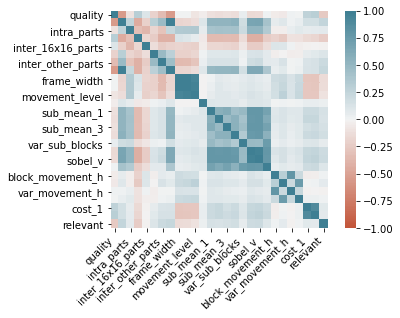

In [192]:
#Read the dataSet
df = pd.read_csv('data.csv')
corrMatrix = df.corr()
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

corrMatrix.style.background_gradient(cmap='coolwarm')


In [193]:
#There is null values in sub_mean_3
df.pop('block_movement_h')
df.pop('block_movement_v')
df.pop('var_movement_h')
df.pop('var_movement_v')
df.pop('cost_1')
df.pop('cost_2')
df.pop('inter_16x16_parts')
df.pop('movement_level')
df.pop('mean')
df.pop('var_sub_blocks')
print(df)
print(df.isnull().any())
print(np.any(np.isnan(df))) 
print(np.all(np.isfinite(df)))

       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
15995       37    66           16           1                9   
15996       37   100           32           0               18   
15997       37   141           16           1                0   
15998       37   335           16           0                6   
15999       37   226           32           0                0   

       inter_other_parts  non_zero_pixels  frame_width  frame_height  \
0                     21              404          416           240   
1                      8              381          416         

In [194]:
#df_sub_mean3=df['sub_mean_3']
#print(df_sub_mean3)
#print(df_num.isnull().any())
#df_prueba=df.replace(to_replace="NULL",value=0)

In [195]:
cat_mask = (df.dtypes==object)
cat_cols = df.columns[cat_mask].tolist()
df_cat = df[cat_cols]
df_num = df.drop(cat_cols,axis=1)
#There is not categorical variables
print(df_cat)
print(df_num)
print(np.any(np.isnan(df_num))) 
print(np.all(np.isfinite(df_num)))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[16000 rows x 0 columns]
       quality  bits  intra_parts  skip_parts  inter_4x4_parts  \
0           22  2143            0           0                3   
1           22  1735            0           2                3   
2           22  1971            0           0                0   
3           22  2473            0           0               18   
4           22  1093            0           0                3   
...        ...   ...          ...         ...              ...   
15995       37    66           16           1                9   
15996       37 

In [196]:
#Imputation of nulls in numerical columns
#df_num.fillna(df_num.mean())
#df_num.replace(to_replace="NULL",value=df_num.mean())
imp_num = SimpleImputer(strategy='mean')
columns = df_num.columns
index = df_num.index
df_num = pd.DataFrame(imp_num.fit_transform(df_num),columns=columns,index=index)
print(df_num.isnull().any())
print(np.any(np.isnan(df_num))) 
print(np.all(np.isfinite(df_num)))

quality              False
bits                 False
intra_parts          False
skip_parts           False
inter_4x4_parts      False
inter_other_parts    False
non_zero_pixels      False
frame_width          False
frame_height         False
sub_mean_1           False
sub_mean_2           False
sub_mean_3           False
sub_mean_4           False
sobel_h              False
sobel_v              False
variance             False
relevant             False
dtype: bool
False
True


In [197]:
#How we do not have categorical variables, we already have the dataFrame without null values
df_preprocessed=df_num
#df_preprocessed.fillna(df_preprocessed.mean())
#df_preprocessed=df_preprocessed.replace([np.inf,-np.inf],np.nan)
#df_preprocessed.fillna(df_preprocessed.mean())
print(df_preprocessed.mean())
print(np.any(np.isnan(df_preprocessed))) 
print(np.all(np.isfinite(df_preprocessed)))
print(df_preprocessed)

quality                29.500000
bits                  449.837312
intra_parts            11.040000
skip_parts              0.849187
inter_4x4_parts         1.978687
inter_other_parts       3.686437
non_zero_pixels        74.087125
frame_width          1432.000000
frame_height          850.000000
sub_mean_1              3.145166
sub_mean_2              2.951684
sub_mean_3              3.034862
sub_mean_4              2.849105
sobel_h                 8.027763
sobel_v                 8.271249
variance               53.332864
relevant                0.822353
dtype: float64
False
True
       quality    bits  intra_parts  skip_parts  inter_4x4_parts  \
0         22.0  2143.0          0.0         0.0              3.0   
1         22.0  1735.0          0.0         2.0              3.0   
2         22.0  1971.0          0.0         0.0              0.0   
3         22.0  2473.0          0.0         0.0             18.0   
4         22.0  1093.0          0.0         0.0              3.0   
...  

In [198]:
#Feature selection
#fs_k_best_chi2 = SelectKBest(chi2,k=4)
#fs_k_best_chi2.fit(df_preprocessed, target_col)
#col_filter=fs_k_best_chi2.get_support()
#df_k_best_chi2 = df_preprocessed.iloc[:, col_filter]
#print(df_k_best_chi2)

In [199]:
df_columns=df_preprocessed.columns
mms = MinMaxScaler()
df_preprocessed = mms.fit_transform(df_preprocessed)
df_preprocessed=pd.DataFrame(df_preprocessed)
df.columns=df_columns
print(df_preprocessed)

        0         1     2     3         4         5         6    7    8   \
0      0.0  0.449172  0.00  0.00  0.090909  0.777778  0.487923  0.0  0.0   
1      0.0  0.363655  0.00  0.50  0.090909  0.296296  0.460145  0.0  0.0   
2      0.0  0.413121  0.00  0.00  0.000000  0.296296  0.555556  0.0  0.0   
3      0.0  0.518340  0.00  0.00  0.545455  0.740741  0.508454  0.0  0.0   
4      0.0  0.229092  0.00  0.00  0.090909  0.296296  0.201691  0.0  0.0   
...    ...       ...   ...   ...       ...       ...       ...  ...  ...   
15995  1.0  0.013834  0.25  0.25  0.272727  0.037037  0.003623  1.0  1.0   
15996  1.0  0.020960  0.50  0.00  0.545455  0.074074  0.009662  1.0  1.0   
15997  1.0  0.029554  0.25  0.25  0.000000  0.148148  0.018116  1.0  1.0   
15998  1.0  0.070216  0.25  0.00  0.181818  0.074074  0.045894  1.0  1.0   
15999  1.0  0.047370  0.50  0.00  0.000000  0.148148  0.028986  1.0  1.0   

             9         10        11        12        13        14        15  \
0      0

In [200]:
print(df_preprocessed[16])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15995    1.0
15996    1.0
15997    1.0
15998    1.0
15999    1.0
Name: 16, Length: 16000, dtype: float64


In [201]:
x_train, x_test, y_train, y_test = train_test_split(df_preprocessed,df_preprocessed[16], test_size=0.3,random_state=1)

In [202]:
print(x_train)

             0         1     2     3         4         5         6         7   \
2477   0.666667  0.091176  0.00  0.00  0.181818  0.444444  0.056763  0.000000   
2076   0.666667  0.005450  0.00  0.50  0.272727  0.037037  0.000000  0.000000   
6616   0.666667  0.052819  0.00  0.00  0.000000  0.148148  0.038647  0.701493   
10870  0.666667  0.131000  1.00  0.00  0.000000  0.000000  0.100242  0.194030   
11861  1.000000  0.004402  0.00  0.25  0.000000  0.000000  0.000000  0.194030   
...         ...       ...   ...   ...       ...       ...       ...       ...   
905    0.000000  0.311256  0.00  0.25  0.090909  0.296296  0.384058  0.000000   
5192   0.333333  0.120729  0.00  0.00  0.272727  0.185185  0.131643  0.701493   
12172  0.000000  0.167470  0.25  0.00  0.272727  0.111111  0.176329  1.000000   
235    0.000000  0.170405  0.00  0.00  0.454545  0.407407  0.172705  0.000000   
13349  0.333333  0.102285  0.75  0.00  0.272727  0.037037  0.082126  1.000000   

             8         9   

In [203]:
print(y_train)

2477     1.0
2076     0.0
6616     1.0
10870    1.0
11861    1.0
        ... 
905      1.0
5192     1.0
12172    1.0
235      1.0
13349    1.0
Name: 16, Length: 11200, dtype: float64


In [204]:
print(x_test)

             0         1     2     3         4         5         6         7   \
2990   0.666667  0.000419  0.00  1.00  0.000000  0.000000  0.000000  0.000000   
13607  0.333333  0.109411  0.25  0.00  0.090909  0.185185  0.094203  1.000000   
10421  0.666667  0.003982  0.00  0.75  0.000000  0.000000  0.000000  0.194030   
6238   0.666667  0.049885  0.50  0.00  0.000000  0.074074  0.026570  0.701493   
6790   0.666667  0.021589  0.00  0.50  0.000000  0.074074  0.010870  0.701493   
...         ...       ...   ...   ...       ...       ...       ...       ...   
9638   0.333333  0.339551  1.00  0.00  0.000000  0.000000  0.317633  0.194030   
4239   0.000000  0.012157  0.00  0.75  0.000000  0.000000  0.008454  0.701493   
7162   1.000000  0.001048  0.00  1.00  0.000000  0.000000  0.000000  0.701493   
10767  0.666667  0.142947  1.00  0.00  0.000000  0.000000  0.120773  0.194030   
6032   0.666667  0.096835  1.00  0.00  0.000000  0.000000  0.094203  0.701493   

             8         9   

In [205]:
print(y_test)

2990     1.0
13607    1.0
10421    0.0
6238     1.0
6790     0.0
        ... 
9638     1.0
4239     1.0
7162     1.0
10767    1.0
6032     1.0
Name: 16, Length: 4800, dtype: float64


In [206]:
reg = LinearRegression().fit(x_train, y_train)
count=0
prediction=reg.predict(x_test)
y_test_array=y_test.to_numpy()
for i in range(len(prediction)):
    prediction[i]=int(prediction[i])
    if(prediction[i] == y_test_array[i]):
       count=count+1
print(count/len(prediction))

0.678125


In [208]:
print("R-squared values: \n")

r2_score(y_test, prediction)

R-squared values: 



-1.2315309668553263

In [209]:
reg.score(x_train,y_train)

1.0